# Tensorflow MNIST

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


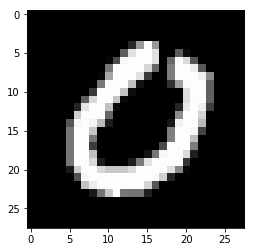

In [20]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

image = mnist.train.images[7].reshape([28, 28]);
plt.gray()
plt.imshow(image)

In [21]:
print(mnist.train.images[7].shape)
print(mnist.train.labels[7].shape)

(784,)
(10,)


In [22]:
print(mnist.train.images[7][150:200])

[0.         0.         0.37254903 0.8862746  0.9921569  0.9921569
 0.8862746  0.         0.         0.36078432 0.0509804  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01960784 0.29803923
 0.97647065 0.9921569  0.9921569  0.9921569  0.8862746  0.
 0.41176474 0.9843138  0.854902   0.34117648 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [23]:
print(mnist.train.labels[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [24]:
learning_rate = 0.1
epochs = 1000
batch_size = 128

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784 # 28 x 28
num_classes = 10

X = tf.placeholder('float', [None, num_input])
Y = tf.placeholder('float', [None, num_classes])

In [25]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'output': tf.Variable(tf.random_normal([num_classes]))
}

In [26]:
def network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    output_layer = tf.matmul(layer_2, weights['output']) + biases['output']

    return output_layer

In [27]:
logits = network(X)

loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y
    )
)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_x, Y: batch_y})

        if epoch % 50 == 0:
            train_accuracy = sess.run(
                accuracy, 
                feed_dict={
                    X: mnist.train.images,
                    Y: mnist.train.labels
                }
            )
            
            print('Epoch #{}: train accuracy = {}'.format(epoch, train_accuracy))

    print('Test accuracy = {}'.format(
        sess.run(
            accuracy,
            feed_dict={
                X: mnist.test.images,
                Y: mnist.test.labels
            }
        )
    ))

Epoch #0: train accuracy = 0.22856363654136658
Epoch #50: train accuracy = 0.8362545371055603
Epoch #100: train accuracy = 0.8586545586585999
Epoch #150: train accuracy = 0.8604909181594849
Epoch #200: train accuracy = 0.8418727517127991
Epoch #250: train accuracy = 0.8675454258918762
Epoch #300: train accuracy = 0.8347272872924805
Epoch #350: train accuracy = 0.8423091173171997
Epoch #400: train accuracy = 0.8359454274177551
Epoch #450: train accuracy = 0.8145818114280701
Epoch #500: train accuracy = 0.8584363460540771
Epoch #550: train accuracy = 0.845090925693512
Epoch #600: train accuracy = 0.8288909196853638
Epoch #650: train accuracy = 0.8527091145515442
Epoch #700: train accuracy = 0.8304181694984436
Epoch #750: train accuracy = 0.8333091139793396
Epoch #800: train accuracy = 0.8579636216163635
Epoch #850: train accuracy = 0.8723090887069702
Epoch #900: train accuracy = 0.8531818389892578
Epoch #950: train accuracy = 0.7597818374633789
Test accuracy = 0.8463000059127808


# Keras MNIST

In [13]:
tf.__version__

'1.8.0'

In [14]:
batch_size = 128
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

_ = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 130us/step - loss: 0.2516 - acc: 0.9239 - val_loss: 0.0956 - val_acc: 0.9684

In [17]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0842073230122216
Test accuracy: 0.9719
